In [170]:
import sys
sys.path.append("..")

import os
import glob

%load_ext autoreload
%autoreload 2

from sicm.sicm import LockIn

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [171]:
parent = "S:/UsersData/Martin/2018/12_Dec/17/lockin_characterisation"
files = glob.glob(parent + "/*/dev662_demods_[0-9]_sample_00000.csv")
files

['S:/UsersData/Martin/2018/12_Dec/17/lockin_characterisation\\sweep_1MOhm_range1_100mV_2long50OhmCables_for_real_000\\dev662_demods_3_sample_00000.csv',
 'S:/UsersData/Martin/2018/12_Dec/17/lockin_characterisation\\sweep_1MOhm_range1_100mV_2long75OhmCables_000\\dev662_demods_3_sample_00000.csv',
 'S:/UsersData/Martin/2018/12_Dec/17/lockin_characterisation\\sweep_1MOhm_range1_500mV_2long75OhmCables_000\\dev662_demods_3_sample_00000.csv',
 'S:/UsersData/Martin/2018/12_Dec/17/lockin_characterisation\\sweep_1MOhm_range1_500mV_2long50OhmCables_for_real_000\\dev662_demods_3_sample_00000.csv',
 'S:/UsersData/Martin/2018/12_Dec/17/lockin_characterisation\\sweep_50Ohm_range1_100mV_short50OhmCable_000\\dev662_demods_3_sample_00000.csv',
 'S:/UsersData/Martin/2018/12_Dec/17/lockin_characterisation\\sweep_1MOhm_range1_100mV_2long50OhmCables_for_real_through_fork_000\\dev662_demods_3_sample_00000.csv',
 'S:/UsersData/Martin/2018/12_Dec/17/lockin_characterisation\\sweep_50Ohm_range1_500mV_2long50Ohm

In [172]:
# 0 ... sweep_1MOhm_range1_100mV_2long50OhmCables_for_real_000
# 1 ... sweep_1MOhm_range1_100mV_2long75OhmCables_000
# 3 ...sweep_1MOhm_range1_500mV_2long50OhmCables_for_real_000
# 5 ... sweep_1MOhm_range1_100mV_2long50OhmCables_for_real_through_fork_000
# 7 ... sweep_1MOhm_range1_100mV_short50OhmCable_000
# 9 ... sweep_1MOhm_range1_500mV_short50OhmCable_000

idx = 7
datadir = os.path.dirname(files[idx])
file = os.path.basename(files[idx])
print("Using data from {}.".format(datadir))

Using data from S:/UsersData/Martin/2018/12_Dec/17/lockin_characterisation\sweep_1MOhm_range1_100mV_short50OhmCable_000.


The resistance of the cable is probably 75 Ohm [[1]](https://www.audiosource.ch/cablage/cables-bnc/bnck-0015bl.html).

What works:

1) guess = [1, .1, .1, .1] , this works with frange = [1e4, 6e4], method = "lm", idx = 0, Z = 50

2) guess = [1e6, 20e-12, .1], frange = [1e4, 1e5]. method = lm, idx = 0, Z = 100)

3) guess = [1e6, 20e-12, .1], frange = [1e4, 1e5], method = lm, idx = 9, Z = 50

4) guess = [1, .1, .1,], frange = [1e4, 5e5], method = lm, idx = 9, Z = 50

5) guess = [1e6, 20e-12, .1]. frange = [1e4, 1e5], method = lm, idx =9, 

**6) guess=guess = (.01, 10, 500e3\*2\*np.pi, 1), franeg=[0,-1], method=dogbox,
idx=7, Z = 50, using lorentzian_fun)**


Exctracting chunk 0 from file S:\UsersData\Martin\2018\12_Dec\17\lockin_characterisation\sweep_1MOhm_range1_100mV_short50OhmCable_000\dev662_demods_3_sample_00000.csv.
Experiment time: 17/12/2018 08:00, # of points: 1000


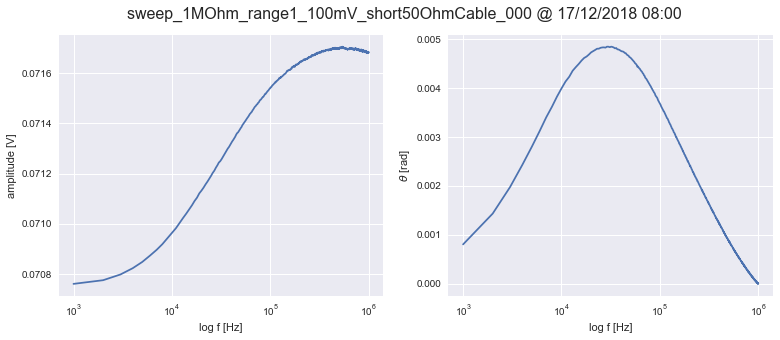

Fitting function to 1000 datapoints ...
Found parameters: [ 9.59486765e+05  2.79967690e+00  3.29954039e+06 -1.42471656e-01].
Finished in 0.049 s


In [191]:
lockin = LockIn(datadir, file)
lockin.load_data()

lockin.plot(xlog = True)

lockin.trim_to_freq(frange = [0, -1])
from math import ceil
import numpy as np

V_out = ceil(1e5*(max(lockin.data["r"]) * np.sqrt(2)))/1e5
guess = (.01, 10, 500e3*2*np.pi, 1)
lockin.get_internal_impedance(V_out, guess, Z = 50)

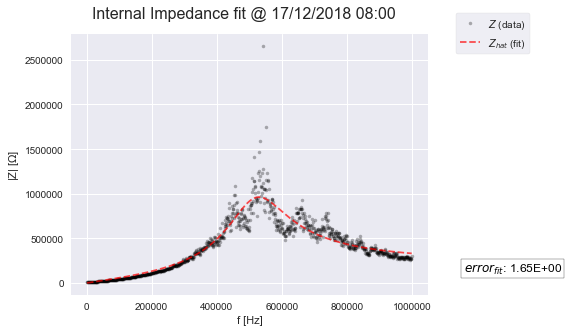

In [192]:
lockin.plot_fit(xlog = False, double_ax = False, plot_range = None)

In [193]:
imped = lockin.predict(32768)
print(imped)

18417.273040743345
